In [3]:
# This project I original used pycharm!!

In [1]:
import requests
 
url = "https://finance.yahoo.com/quote/AAPL?p=AAPL&.tsrc=fin-srch"
 
response = requests.get(url)
 
#print(response.status_code)
#<Response [200]>
#https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

# 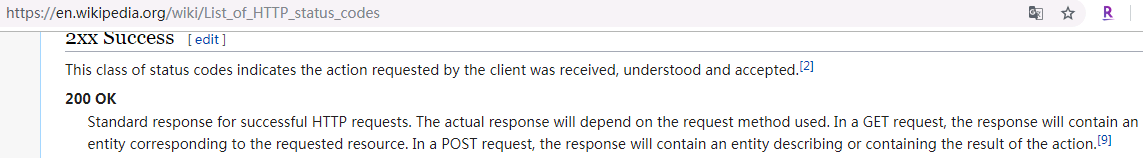

In [4]:
indicatorDict = {"Previous Close":[],
              "Open":[],
              "Bid":[],
              "Ask":[],
              "Day's Range":[],
              "52 Week Range":[],
              "Volume":[],
              "Avg. Volume":[],
              "Market Cap":[],
              "Beta":[],
              "PE Ratio (TTM)":[],
              "EPS (TTM)":[],
              "Earnings Date":[],
              "Dividend & Yield":[],
              "Ex-Dividend Date":[],
              "1y Target Est":[]
              }

In [5]:
htmlText = response.text
print(htmlText)

<!DOCTYPE html><html id="atomic" class="NoJs chrome desktop failsafe" lang="en-US"><head prefix="og: http://ogp.me/ns#"><script>window.performance && window.performance.mark && window.performance.mark('PageStart');</script><meta charset="utf-8" /><title>Apple Inc. (AAPL) Stock Price, News, Quote &amp; History - Yahoo Finance</title><meta name="keywords" content="AAPL, Apple Inc., AAPL stock chart, Apple Inc. stock chart, stock chart, stocks, quotes, finance" /><meta http-equiv="x-dns-prefetch-control" content="on" /><meta property="twitter:dnt" content="on" /><meta property="fb:app_id" content="458584288257241" /><meta name="theme-color" content="#400090" /><meta name="viewport" content="width=device-width, initial-scale=1" /><meta name="description" lang="en-US" content="Find the latest Apple Inc. (AAPL) stock quote, history, news and other vital information to help you with your stock trading and investing." /><meta name="oath:guce:consent-host" content="guce.yahoo.com" /><meta name=

# Positioning

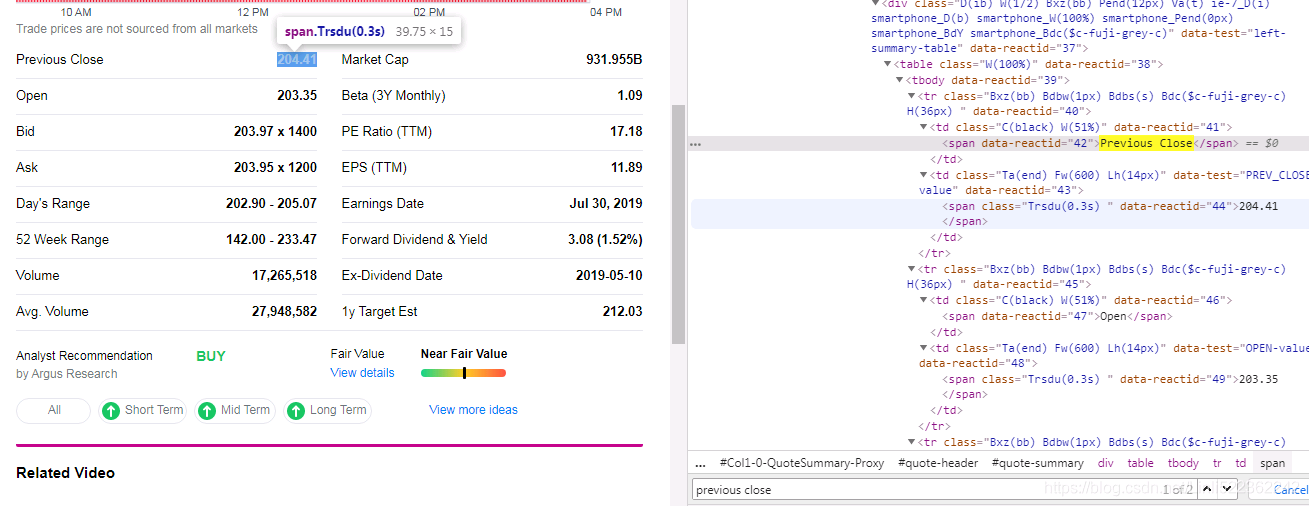

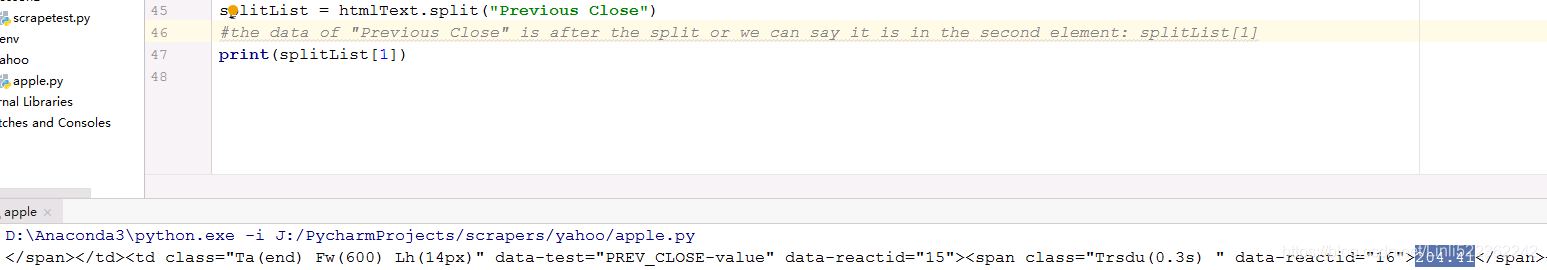

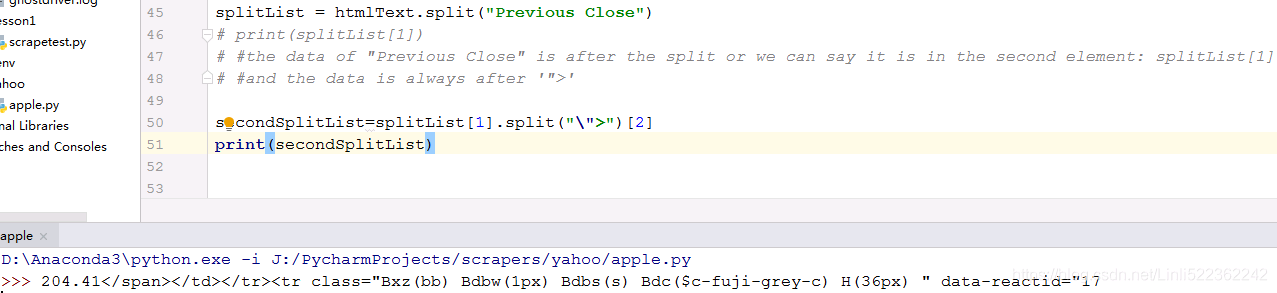

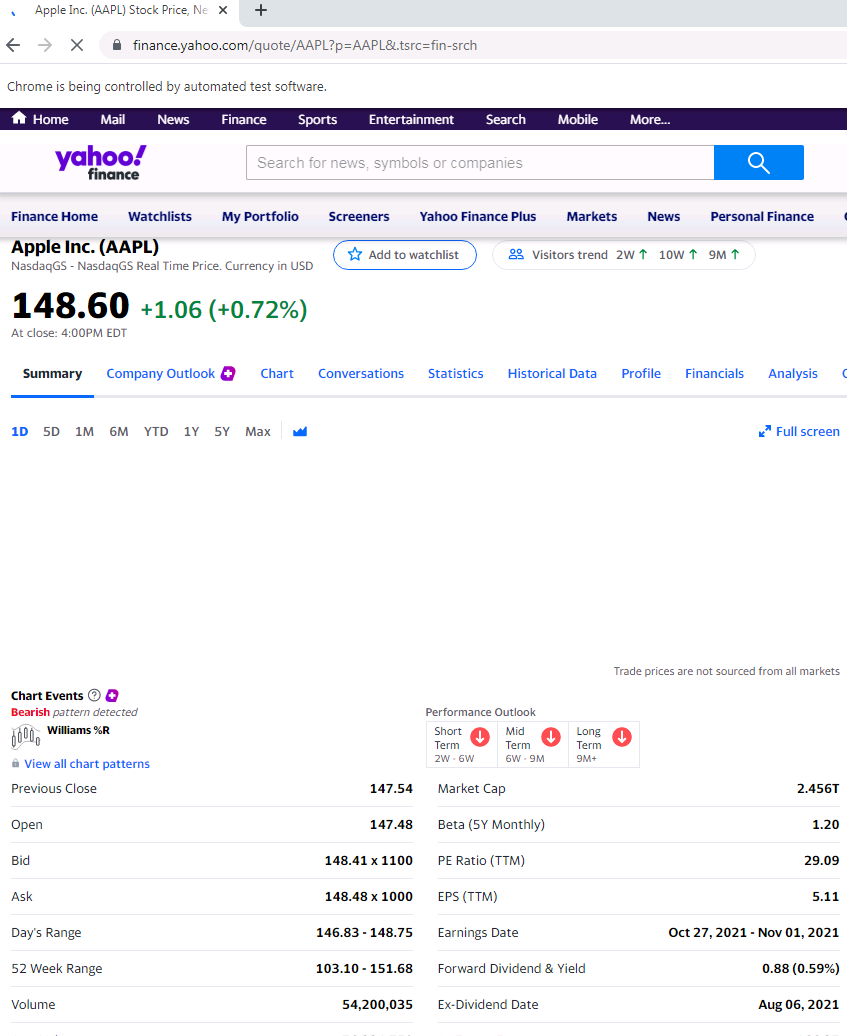
# ALL CODE

In [9]:
from selenium import webdriver

url = "https://finance.yahoo.com/quote/AAPL?p=AAPL&.tsrc=fin-srch"

browserDriver = webdriver.Chrome(executable_path='C:/chromedriver/chromedriver')
browserDriver.get(url)

#1. print page_source
#print(browserDriver.page_source)

#2. look for a data in jason format/dict(actually the data is in <script>), such as 205.66 (previous close price)
# I found

#3. web page structure
# elements = browserDriver.find_elements_by_xpath("html")
# # counter =1
# # for element in elements:
# #     if "PreviousClose" in element.get_attribute("textContent"):
# #         print(counter)
# #     counter +=1

#4. write a function
def findXPath(elementTag, target, path):
    if target in elementTag.get_attribute("textContent") and elementTag.tag_name == "script":
        return path

    #if not, I want to go deeper                      #"./": current directory
    childrenElements = elementTag.find_elements_by_xpath("./*") # goes deeper
    for childNode in childrenElements:
        print(path+"/" + childNode.tag_name)

        finalPath = findXPath(childNode,target,path+"/"+childNode.tag_name)
        if finalPath != "":
            return finalPath
    return ""

# uniqueElement = browserDriver.find_element_by_xpath("html")
# print("The final path is: ", findXPath(uniqueElement, "PreviousClose", "html"))
# #html/body/script

# elements = browserDriver.find_elements_by_xpath("html/body/script")
# counter = 1
# for element in elements:
#     if "PreviousClose" in element.get_attribute("textContent"):
#         print(counter)
#     counter +=1
# #1 : the first one

# element = browserDriver.find_element_by_xpath("html/body/script[1]")
# print(element.get_attribute("textContent"))

import json

def findJsonPath(jsonObject, target, path, matchType):
    if type(jsonObject) == matchType:
        if target in jsonObject:
            return path

        for key in jsonObject.keys():
            finalPath = findJsonPath(jsonObject[key], target, path+","+key, matchType)
            if finalPath != "":
                return finalPath
    return ""



element = browserDriver.find_element_by_xpath("html/body/script[1]")
tempData = element.get_attribute("textContent").strip("(this));\n") #note the new line
#the data is after "root.App.main = "
tempData = tempData.split("root.App.main = ")[1][:-3]  #dict, ";", "}"
#print(tempData)

jsonData = json.loads(tempData)
#print(jsonData.keys()) #dict_keys(['context', 'plugins'])

matchType = type(jsonData)
#print("Final Path is: ", findJsonPath(jsonData, "trailingEps", "", matchType))
# #print("Final Path is: ", findJsonPath(jsonData, "previousClose", "", matchType))
# #Final Path is:  ,context,dispatcher,stores,QuoteSummaryStore,summaryDetail

# #print("Final Path is: ", findJsonPath(jsonData, "trailingEps", "", matchType))
# #Final Path is:  ,context,dispatcher,stores,QuoteSummaryStore,defaultKeyStatistics


#print(jsonData["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["summaryDetail"])
#print(jsonData["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["defaultKeyStatistics"])

finalData1=jsonData["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["summaryDetail"]
finalData2=jsonData["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["defaultKeyStatistics"]

In [10]:
finalData1

{'previousClose': {'raw': 147.54, 'fmt': '147.54'},
 'regularMarketOpen': {'raw': 147.48, 'fmt': '147.48'},
 'twoHundredDayAverage': {'raw': 133.22108, 'fmt': '133.22'},
 'trailingAnnualDividendYield': {'raw': 0.0056594824, 'fmt': '0.57%'},
 'payoutRatio': {'raw': 0.16309999, 'fmt': '16.31%'},
 'volume24Hr': {},
 'regularMarketDayHigh': {'raw': 148.75, 'fmt': '148.75'},
 'navPrice': {},
 'averageDailyVolume10Day': {'raw': 59850842,
  'fmt': '59.85M',
  'longFmt': '59,850,842'},
 'totalAssets': {},
 'regularMarketPreviousClose': {'raw': 147.54, 'fmt': '147.54'},
 'fiftyDayAverage': {'raw': 147.16342, 'fmt': '147.16'},
 'trailingAnnualDividendRate': {'raw': 0.835, 'fmt': '0.83'},
 'open': {'raw': 147.48, 'fmt': '147.48'},
 'toCurrency': None,
 'averageVolume10days': {'raw': 59850842,
  'fmt': '59.85M',
  'longFmt': '59,850,842'},
 'expireDate': {},
 'yield': {},
 'algorithm': None,
 'dividendRate': {'raw': 0.88, 'fmt': '0.88'},
 'exDividendDate': {'raw': 1628208000, 'fmt': '2021-08-06'},

In [11]:
finalData2

{'annualHoldingsTurnover': {},
 'enterpriseToRevenue': {'raw': 7.288, 'fmt': '7.29'},
 'beta3Year': {},
 'profitMargins': {'raw': 0.25004, 'fmt': '25.00%'},
 'enterpriseToEbitda': {'raw': 22.808, 'fmt': '22.81'},
 '52WeekChange': {'raw': 0.15158093, 'fmt': '15.16%'},
 'morningStarRiskRating': {},
 'forwardEps': {'raw': 5.67, 'fmt': '5.67'},
 'revenueQuarterlyGrowth': {},
 'sharesOutstanding': {'raw': 16530199552,
  'fmt': '16.53B',
  'longFmt': '16,530,199,552'},
 'fundInceptionDate': {},
 'annualReportExpenseRatio': {},
 'totalAssets': {},
 'bookValue': {'raw': 3.882, 'fmt': '3.88'},
 'sharesShort': {'raw': 93105968, 'fmt': '93.11M', 'longFmt': '93,105,968'},
 'sharesPercentSharesOut': {'raw': 0.0056, 'fmt': '0.56%'},
 'fundFamily': None,
 'lastFiscalYearEnd': {'raw': 1601078400, 'fmt': '2020-09-26'},
 'heldPercentInstitutions': {'raw': 0.58427, 'fmt': '58.43%'},
 'netIncomeToCommon': {'raw': 86801997824,
  'fmt': '86.8B',
  'longFmt': '86,801,997,824'},
 'trailingEps': {'raw': 5.108,

# Scraping Website(yahoo finance_appl) that load data with Javascript (from selenium import webdriver)

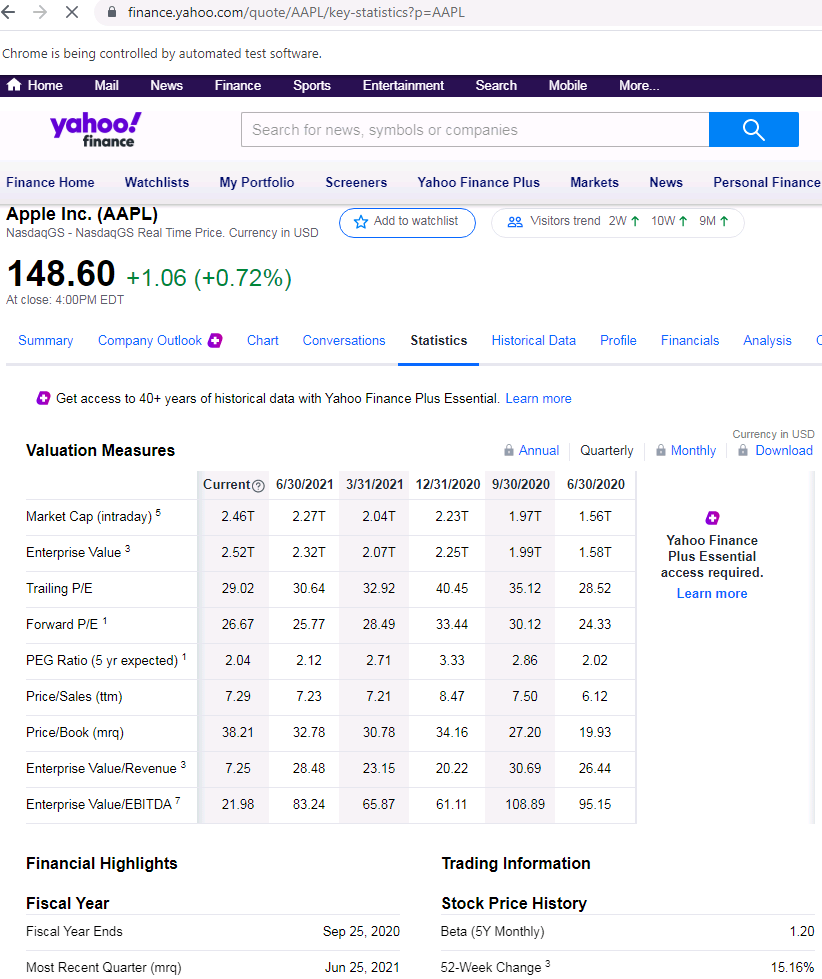

In [13]:
#!/usr/bin/python
#encoding:utf-8
 
"""
@author: LlQ
@contact:LIQINGLIN54951@gmail.com
@file：appleSta.py
@time: 7/14/2019 3:18 PM
"""
 
from selenium import webdriver
import json
 
url = "https://finance.yahoo.com/quote/AAPL/key-statistics?p=AAPL"
 
browserDriver = webdriver.Chrome(executable_path='C:/chromedriver/chromedriver')
browserDriver.get(url)
 
"trailingPE"
 
def findXPath(element, target, path):
    if target in element.get_attribute("textContent") and element.tag_name == "script" :
        return path
                                                      #"./": current directory
    childrenElements = element.find_elements_by_xpath("./*") #goes deeper
    for childElement in childrenElements:
        print(path+"/" +childElement.tag_name)
        final = findXPath(childElement, target, path+"/" +childElement.tag_name)
        if final !="":
            return final
    return ""
 
def findJsonPath(jsonObject, target, path, matchType):
    if type(jsonObject) == matchType:
        if target in jsonObject:
            return path
        for newKey in jsonObject.keys():
            final = findJsonPath(jsonObject[newKey], target, path + ","+newKey, matchType)
            if final != "":
                return final
    return ""
 
 
# print(browserDriver.page_source)
 
# find certain element
# element = browserDriver.find_element_by_xpath("html")
# print(element.text)
 
#find certain element
# element = browserDriver.find_element_by_xpath("html")
# print(element.get_attribute("textContent"))
 
# find childElements                               # "/*":all children under the "html:
# elements = browserDriver.find_elements_by_xpath("html/*")
# for childElement in elements:
#    print(childElement.tag_name)
 
# elements = browserDriver.find_elements_by_xpath("html/head/*")
# for childElement in elements:
#     print(childElement.tag_name)
 
 
#17.10: "trailingPE"
 
# elements = browserDriver.find_elements_by_xpath("html")
# counter = 1
# for element in elements:
#    if "trailingPE" in element.get_attribute("textContent"):
#        print(counter)
#    counter +=1
 
# element = browserDriver.find_element_by_xpath("html")
# print("The final path is: ", findXPath(element, "trailingPE","html"))
#The final path is:  html/body/script
    
# elements = browserDriver.find_elements_by_xpath("html/body/script")
# counter = 1
# for element in elements:
#     if "trailingPE" in element.get_attribute("textContent"):
#         print(counter)  #1
#     counter +=1
#the first one
 
# element = browserDriver.find_element_by_xpath("html/body/script[1]")
# print(element.get_attribute("textContent"))
#only one match
#"trailingPE":{"raw":17.102716,"fmt":"17.10"}  #json format
 
 
element = browserDriver.find_element_by_xpath("html/body/script[1]")
tempData = element.get_attribute("textContent").strip("(this));\n")
#the data is after "root.App.main ="  #
tempData=tempData.split("root.App.main = ")[1][:-3]
jsonData = json.loads(tempData)
#print(jsonData.keys()) #dict_keys(['context', 'plugins'])
 
matchType = type(jsonData)
#print("Final Path is: ", findJsonPath(jsonData, "trailingPE", "", matchType))
#Final Path is:  ,context,dispatcher,stores,QuoteSummaryStore,summaryDetail
#print(jsonData["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["summaryDetail"])
 
finalData=jsonData["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["summaryDetail"]
 
import pandas as pd
df = pd.DataFrame(data = finalData)
print(df)
browserDriver.quit()

        previousClose regularMarketOpen twoHundredDayAverage  \
raw            147.54            147.48              133.221   
fmt            147.54            147.48               133.22   
longFmt           NaN               NaN                  NaN   

        trailingAnnualDividendYield payoutRatio  volume24Hr  \
raw                      0.00565948      0.1631         NaN   
fmt                           0.57%      16.31%         NaN   
longFmt                         NaN         NaN         NaN   

        regularMarketDayHigh  navPrice averageDailyVolume10Day  totalAssets  \
raw                   148.75       NaN                59850842          NaN   
fmt                   148.75       NaN                  59.85M          NaN   
longFmt                  NaN       NaN              59,850,842          NaN   

         ... forwardPE maxAge fromCurrency fiveYearAvgDividendYield  \
raw      ...   26.2081      1         None                     1.29   
fmt      ...     26.21      1  